In [14]:
import kagglehub
from matplotlib.pyplot import plot_date

# Download latest version
path = kagglehub.dataset_download("ahsanaseer/top-rated-tmdb-movies-10k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bunny\.cache\kagglehub\datasets\ahsanaseer\top-rated-tmdb-movies-10k\versions\1


In [15]:
import pandas as pd

In [16]:
movies = pd.read_csv(f"{path}/top10k-TMDB-movies.csv")

In [17]:
movies

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668


In [18]:
from datetime import datetime
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies["release_year"] = movies["release_date"].dt.year

import numpy as np

movies["overview_missing"] = np.where(movies["overview"].isna(),1,0)
movies["age_of_the_movie"] = 2025 - movies["release_year"]

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

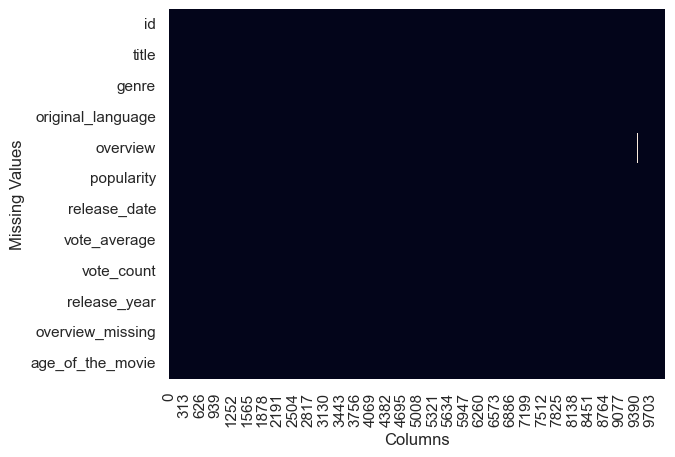

In [20]:
ax = plt.axes()
sns.heatmap(movies.isna().transpose(), cbar = False, ax = ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

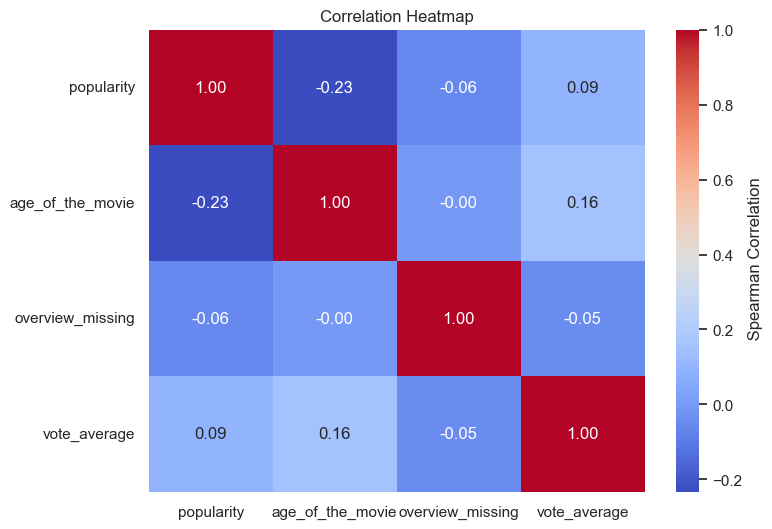

In [21]:
columns_of_interest = ["popularity","age_of_the_movie","overview_missing","vote_average"]

correlation_matrix = movies[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = ".2f",cmap="coolwarm", cbar_kws={"label": " Spearman Correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()

In [22]:
movies_cleaned = movies[
    (~movies["overview"].isna()) &
    (~movies["popularity"].isna()) &
    (~movies["vote_average"].isna()) &
    (~movies["release_year"].isna())
]

In [23]:
movies_cleaned

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,release_year,overview_missing,age_of_the_movie
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994,0,31
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995,0,30
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972,0,53
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,1993,0,32
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010,0,15
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,2015,0,10
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990,0,35
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007,0,18


In [24]:
movies_cleaned

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,release_year,overview_missing,age_of_the_movie
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994,0,31
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995,0,30
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972,0,53
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,1993,0,32
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010,0,15
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,2015,0,10
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990,0,35
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007,0,18


In [25]:
movies_cleaned = movies_cleaned.copy()
movies_cleaned["overview"] = movies_cleaned["overview"].fillna("")
movies_cleaned["words_in_overview"] = movies_cleaned["overview"].str.split().str.len()


In [30]:
movies_cleaned_35_words = movies_cleaned.loc[movies_cleaned["words_in_overview"] >= 35]

In [31]:
movies_cleaned_35_words

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,release_year,overview_missing,age_of_the_movie,words_in_overview
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994,0,31,69
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995,0,30,70
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972,0,53,48
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974,0,51,39
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093,2001,0,24,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,168098,Cell,"Horror,Science Fiction,Thriller",en,When a strange signal pulsates through all cel...,19.521,2016-07-06,4.7,910,2016,0,9,43
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010,0,15,36
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990,0,35,61
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007,0,18,36


In [38]:
movies_35 = movies_cleaned_35_words.copy()
movies_35["tagged_overview"]=movies_35[["id","overview"]].astype(str).agg(" ".join, axis=1)

In [39]:
movies_35

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,release_year,overview_missing,age_of_the_movie,words_in_overview,tagged_overview
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994,0,31,69,278 Framed in the 1940s for the double murder ...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995,0,30,70,"19404 Raj is a rich, carefree, happy-go-lucky ..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972,0,53,48,"238 Spanning the years 1945 to 1955, a chronic..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974,0,51,39,240 In the continuing saga of the Corleone cri...
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093,2001,0,24,35,"129 A young girl, Chihiro, becomes trapped in ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,168098,Cell,"Horror,Science Fiction,Thriller",en,When a strange signal pulsates through all cel...,19.521,2016-07-06,4.7,910,2016,0,9,43,168098 When a strange signal pulsates through ...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010,0,15,36,10196 The story follows the adventures of Aang...
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990,0,35,61,"13995 During World War II, a brave, patriotic ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007,0,18,36,2312 A man named Farmer sets out to rescue his...


In [40]:
(
    movies_35.drop(["overview_missing","age_of_the_movie","words_in_overview"], axis=1).to_csv("movies_cleaned.csv", index=False)
)